In [1]:
# Import libraries and modules.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.formula.api import ols
import statsmodels.api as sm
import numpy as np

In [2]:
#Gets dataframe
data = pd.read_excel(r"D:\Additional Files\Analysis\Regression_Project.xlsx",sheet_name='Total-Data')


#Quick clean up and check for row duplicates and general info
data = data.drop(columns = ['Unnamed: 0','Rand #', 'Unnamed: 10', 'Total Count',199])
#data['age']=np.log(data['age'])#did make model better
print("Total Row Duplicates:" + str(data.duplicated().sum()))
print("Data's Shape:"+str(data.shape))
print(data.info())

Total Row Duplicates:0
Data's Shape:(199, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Gender                   199 non-null    object
 1   age                      199 non-null    int64 
 2   total_optimism           199 non-null    int64 
 3   total_mastery            199 non-null    int64 
 4   total_positive_affect    199 non-null    int64 
 5   total_negative_affect    199 non-null    int64 
 6   total_perceived_stress   199 non-null    int64 
 7   Total_life_Satisfaction  199 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 12.6+ KB
None


In [3]:
data.head(10)#look into data

,Gender,age,total_optimism,total_mastery,total_positive_affect,total_negative_affect,total_perceived_stress,Total_life_Satisfaction
0,M,42,27,21,33,15,25,29
1,F,39,19,20,34,26,24,14
2,F,47,24,20,30,25,29,27
3,F,29,23,23,38,17,23,24
4,M,65,20,19,37,10,20,18
5,F,40,19,19,28,26,30,12
6,M,22,28,28,40,19,21,26
7,F,45,16,20,16,23,28,30
8,F,74,26,23,43,10,16,34
9,F,36,24,24,27,20,26,12


In [4]:
#Encode categorical Variable
x_encoder = OneHotEncoder(drop = 'first', sparse_output =False)
Gender = x_encoder.fit_transform(data['Gender'].values.reshape(-1,1)).ravel()
Gender= pd.Series(Gender, name = 'Gender')

#drop and replace old categorical variable
data_preconcat = data.drop(columns = ['Gender'])
data_encoded = pd.concat([data_preconcat,Gender],axis = 1)
data_encoded.head()

,age,total_optimism,total_mastery,total_positive_affect,total_negative_affect,total_perceived_stress,Total_life_Satisfaction,Gender
0,42,27,21,33,15,25,29,1.0
1,39,19,20,34,26,24,14,0.0
2,47,24,20,30,25,29,27,0.0
3,29,23,23,38,17,23,24,0.0
4,65,20,19,37,10,20,18,1.0


no major multicollinearity found but be weary of negative affect and percieved stress


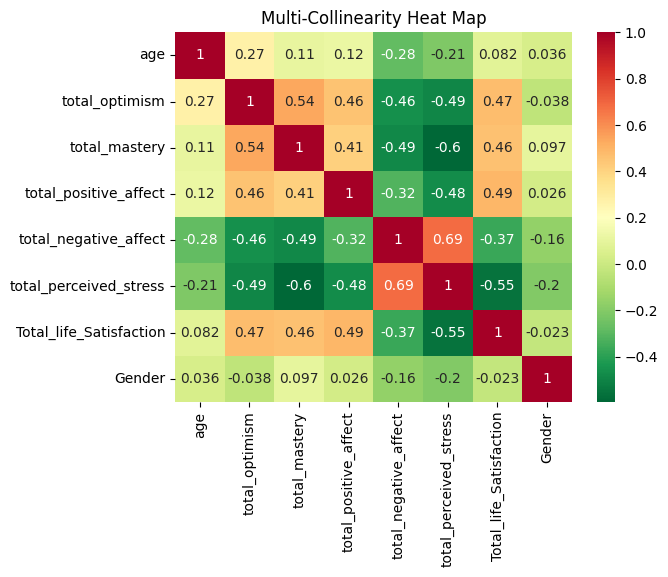

In [5]:
#find multicollinearity > avg(abs(0.70))
data_correlations = data_encoded.corr()
sns.heatmap(data_correlations,annot = True, cmap = 'RdYlGn_r')

plt.title("Multi-Collinearity Heat Map")
print("no major multicollinearity found but be weary of negative affect and percieved stress")          

In [28]:
# initiate train test split
x = data_encoded[['Gender', 'age',	'total_optimism','total_mastery', 'total_positive_affect', 'total_negative_affect',	'total_perceived_stress']]
y = data['Total_life_Satisfaction']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =40)

#Check shapes
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(159, 7)
(159,)
(40, 7)
(40,)


In [29]:
#Define, Train and see training summary.
ols_data = pd.concat([x_train, y_train],axis =1)
ols_data.shape
ols_formula = (
    "Total_life_Satisfaction ~ age +"
    "total_optimism + total_mastery +"
    "total_positive_affect + total_negative_affect +"
    "total_perceived_stress + C(Gender)"
    )


model = ols(formula=ols_formula, data=ols_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Total_life_Satisfaction   R-squared:                       0.391
Model:                                 OLS   Adj. R-squared:                  0.362
Method:                      Least Squares   F-statistic:                     13.83
Date:                     Wed, 06 Nov 2024   Prob (F-statistic):           9.07e-14
Time:                             10:11:09   Log-Likelihood:                -488.66
No. Observations:                      159   AIC:                             993.3
Df Residuals:                          151   BIC:                             1018.
Df Model:                                7                                         
Covariance Type:                 nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 17.7671      6.185      2.873      0.005       5.547      29.988
C(Gender)[T.1.0]          -1.3062      0.896     -1.458      0.147      -3.077       0.464
age                       -0.0036      0.036     -0.101      0.920      -0.074       0.067
total_optimism             0.1560      0.135      1.158      0.249      -0.110       0.422
total_mastery              0.1954      0.155      1.259      0.210      -0.111       0.502
total_positive_affect      0.2370      0.075      3.179      0.002       0.090       0.384
total_negative_affect      0.0730      0.087      0.839      0.403      -0.099       0.245
total_perceived_stress    -0.4309      0.110     -3.903      0.000      -0.649      -0.213
==============================================================================
Omnibus:                        0.954   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.621   Jarque-Bera (JB):                0.954
Skew:                           0.020   Prob(JB):                        0.621
Kurtosis:                       2.623   Cond. No.                         991.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

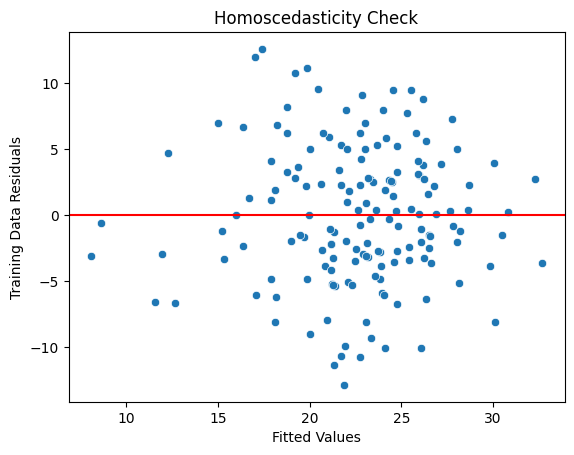

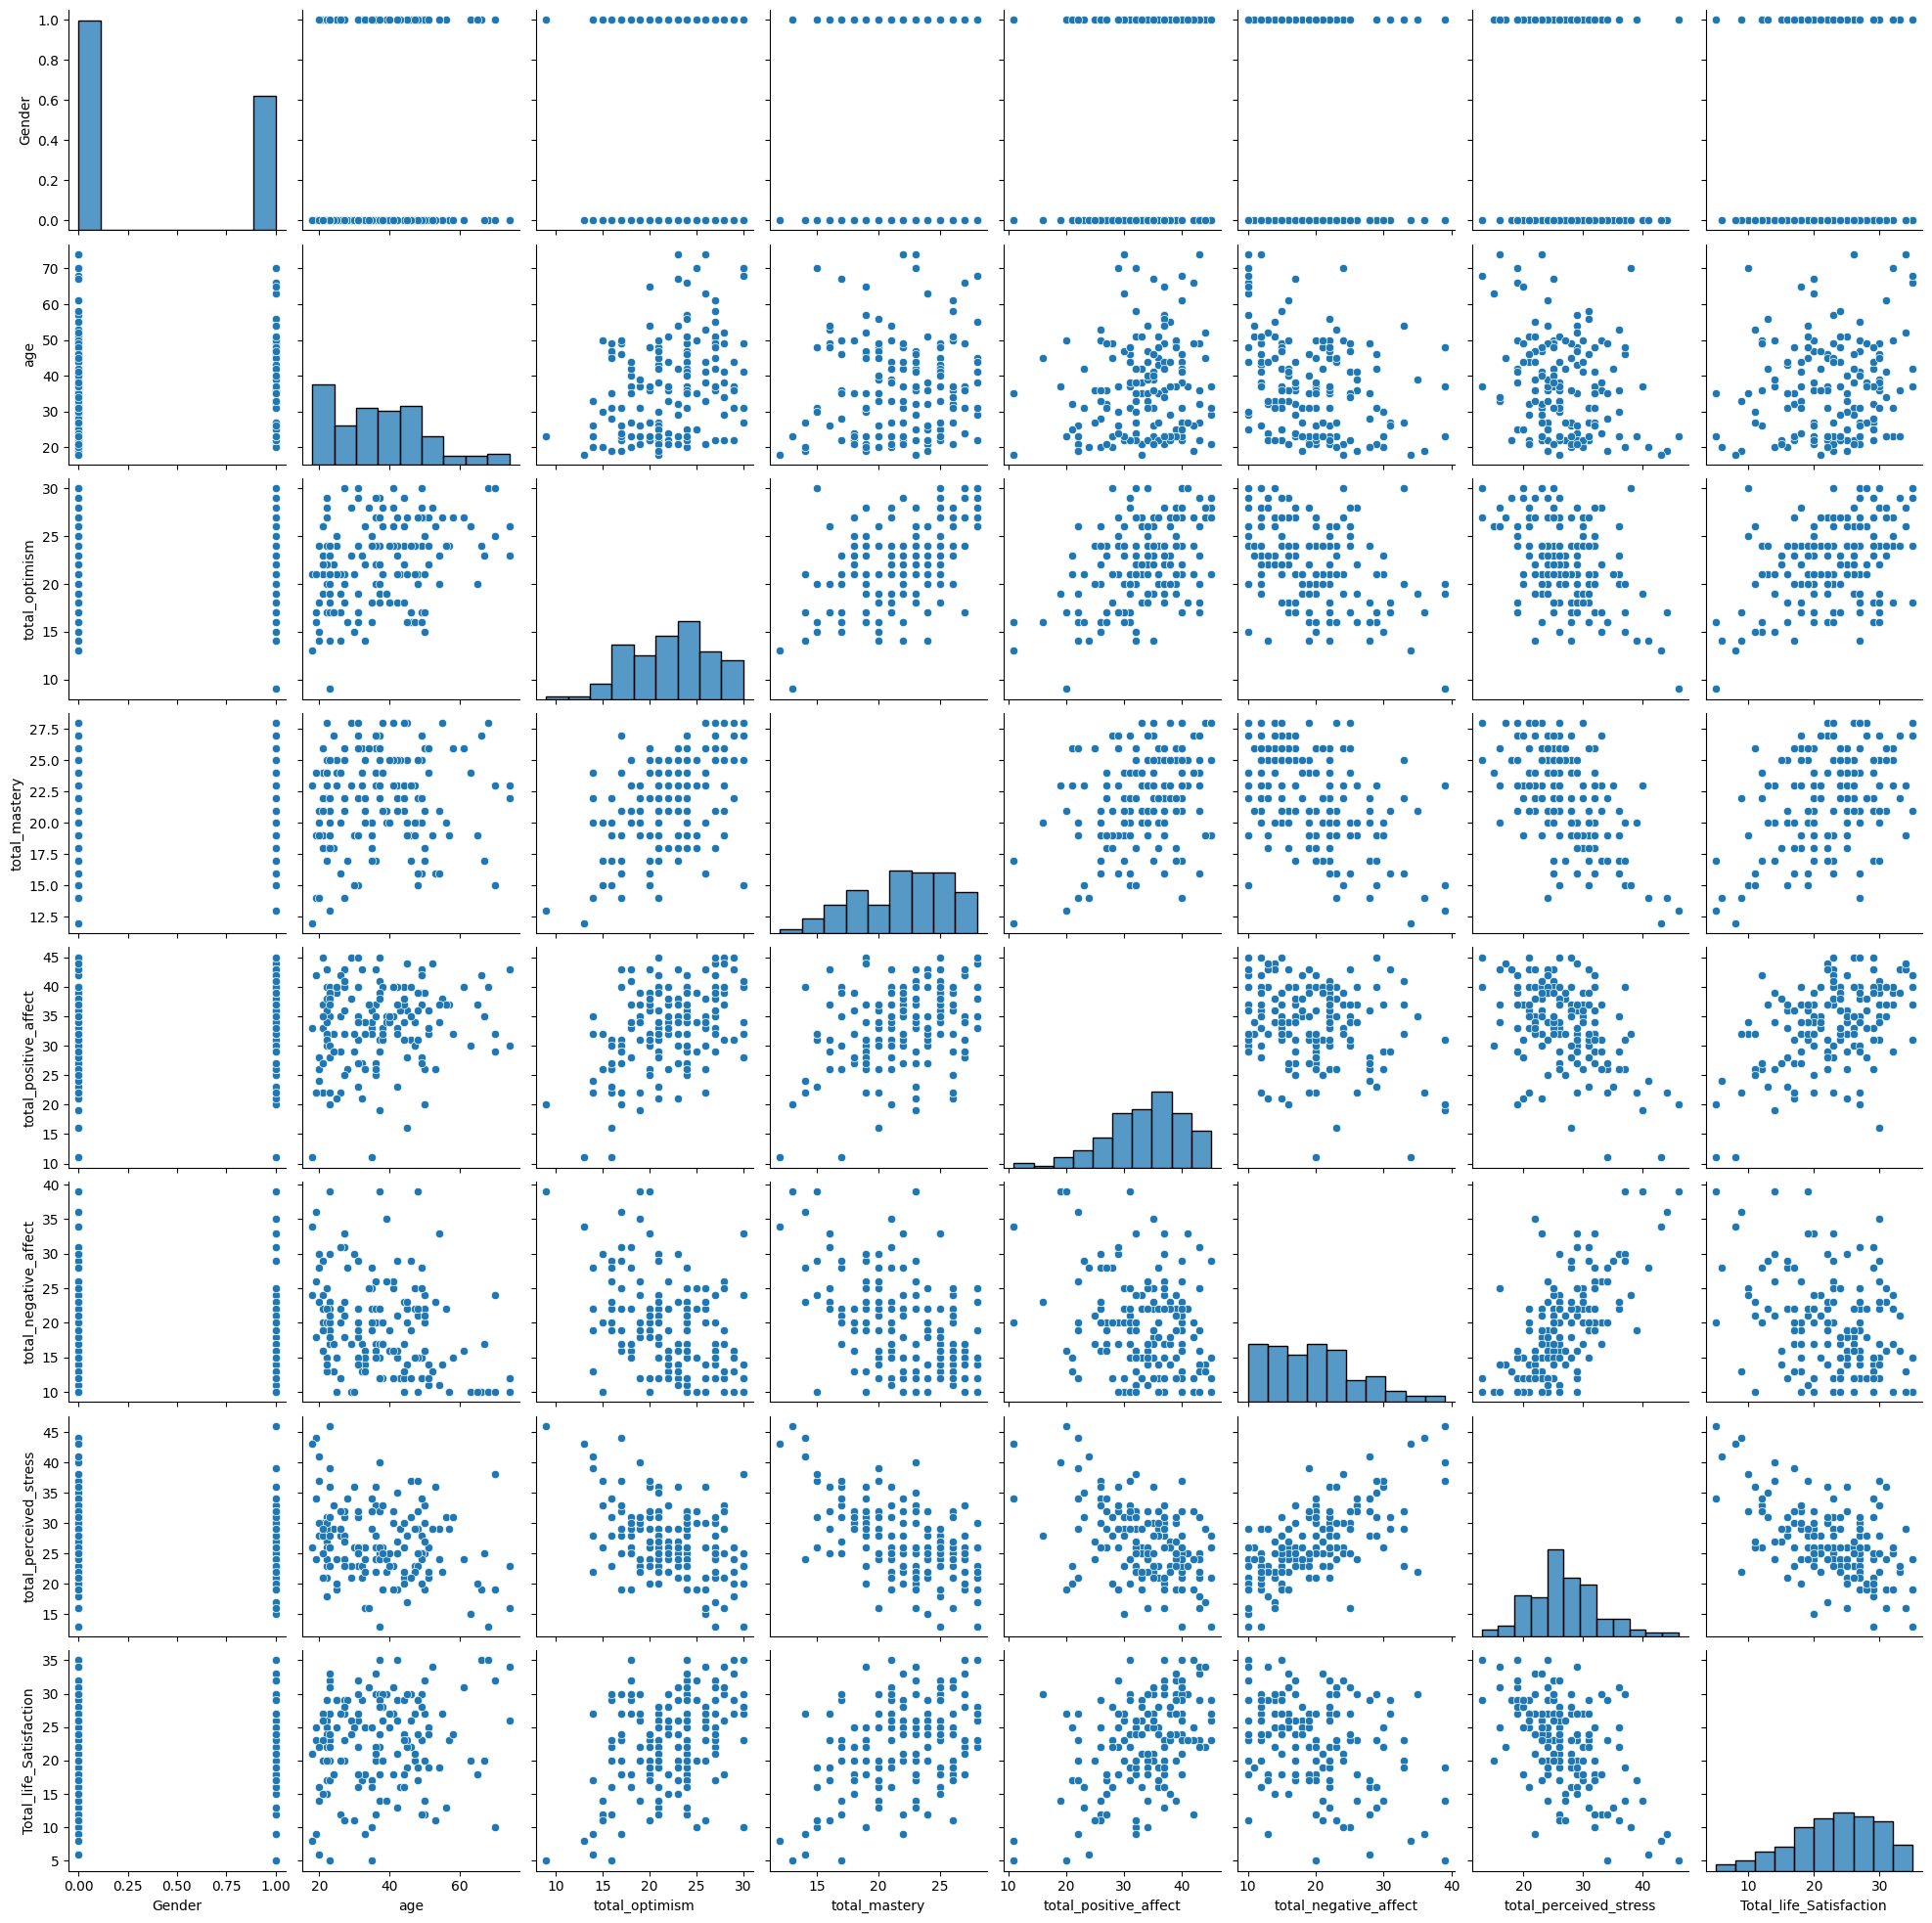

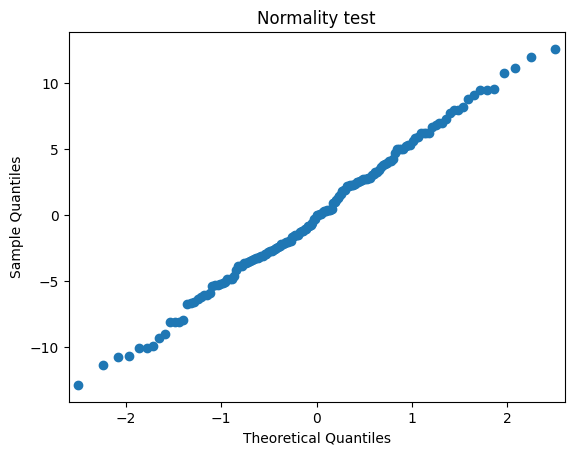

In [30]:
#Check Assumptions

#Homoscedasticity
sns.scatterplot(x = model.fittedvalues, y= model.resid)
plt.title("Homoscedasticity Check")
plt.xlabel("Fitted Values")
plt.ylabel("Training Data Residuals")
plt.axhline(0,color ='red')

#Linearity
sns.pairplot(ols_data)

#Normality
sm.qqplot(model.resid)
plt.title("Normality test")

plt.show()

In [32]:
#Testing Model

y_pred = model.predict(x_test)#Predict

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)
n = len(y_test) #instances
p = x_test.shape[1] #predictors
adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

print("Mean absolute error: "+str(mae))
print("Mean squared error: "+str(mse))
print("Root Mean squared error: "+str(rmse))
print("Adj R^2: "+str(adj_r2))

Mean absolute error: 4.455974824517993
Mean squared error: 26.428851102680756
Root Mean squared error: 5.140899833947434
Adj R^2: 0.3557967543721565


Interpretation
The model is overall significant. It has an adjusted R^2 of 0.36 which accounts for 36% of the variance from the mean as a predictor. This indicates moderate predictability however, when changing the random state of the train test split between 37-42 the average adjusted R^2 is 0.19 (when evaluating testing data): indicating low-moderate predictability.

When testing each coefficient for significance the following variables were not found to be significant: Gender, age, mastery, and negative affect and therefore should be interpreted with caution. The significant variables were optimism, positive affect and perceived stress.

Total life satisfaction is affected in the following ways:

1.The Male gender decreases total life satisfaction by 1.5. 
2.An increase in age decreases life satisfaction by 0.04.
3.An increase in optimism increases life satisfaction by 0.31.
4.Total mastery increases life satisfaction by 0.11.
5.Positive affect increases life satisfaction by 0.24.
6.negative affect decreases life satisfaction by 0.004.
7.perceived stress decreases life satisfaction by 0.4 per unit increase and has the greatest significance.



